In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer

In [3]:
import pickle
import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/ME683/cuboid/metal_merged_cuboid.csv')

In [4]:
data

rho           E       nu  a  b  c        f1        f2  \
0        6110.000000  128.000000  0.37000  1  2  8  0.673035  0.728011   
1        7310.000000   50.000000  0.36000  1  2  8  0.920299  0.929082   
2        6511.000000   67.000000  0.34000  1  2  8  0.855240  0.870606   
3        7010.000000   41.000000  0.28000  1  2  8  0.936469  0.954165   
4        8570.000000  105.000000  0.40000  1  2  8  0.841755  0.853253   
...              ...         ...      ... .. .. ..       ...       ...   
293682  17062.588420  186.745656  0.28101  4  6  7  0.977860  0.979278   
293683   5340.442084   33.253319  0.34854  4  6  7  0.992497  0.992632   
293684  10183.233930   53.112658  0.26944  4  6  7  0.991820  0.992300   
293685   9181.825681  102.209640  0.27635  4  6  7  0.977194  0.977220   
293686  10250.577320  173.191202  0.32317  4  6  7  0.962830  0.963215   

              f3        f4  ...       f21       f22       f23       f24  \
0       0.741976  0.769326  ...  1.087171  1.108797  1.118980  1.147124   
1       0.930513  0.931765  ...  1.050433  1.051583  1.054046  1.054303   
2       0.880019  0.880077  ...  1.048381  1.055423  1.063596  1.063681   
3       0.954842  0.968828  ...  1.023546  1.023736  1.029884  1.036943   
4       0.876858  0.880704  ...  1.062618  1.062693  1.067246  1.095626   
...          ...       ...  ...       ...       ...       ...       ...   
293682  0.979523  0.979627  ...  1.010155  1.010504  1.011443  1.014072   
293683  0.992896  0.993924  ...  1.003336  1.004670  1.004833  1.005249   
293684  0.992894  0.993118  ...  1.002629  1.002801  1.003355  1.003696   
293685  0.979613  0.980165  ...  1.006481  1.007765  1.008176  1.012310   
293686  0.963512  0.965959  ...  1.010482  1.012294  1.016220  1.016688   

             f25       f26       f27       f28       f29       f30  
0       1.148189  1.175179  1.183941  1.195690  1.209729  1.232676  
1       1.056372  1.060492  1.068504  1.071042  1.074012  1.074721  
2       1.078316  1.098101  1.098671  1.105719  1.128428  1.131313  
3       1.037585  1.050004  1.051020  1.056617  1.058855  1.066637  
4       1.109565  1.110328  1.110342  1.124554  1.136007  1.140405  
...          ...       ...       ...       ...       ...       ...  
293682  1.014278  1.015275  1.016253  1.016722  1.018660  1.020192  
293683  1.006102  1.006469  1.006631  1.007005  1.007292  1.007401  
293684  1.005199  1.005365  1.005713  1.005767  1.006547  1.007411  
293685  1.013547  1.016362  1.019045  1.019056  1.020931  1.021633  
293686  1.018899  1.019469  1.023167  1.024179  1.029690  1.031406  

[293687 rows x 36 columns]

In [5]:
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [6]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.004)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 55.195584967177446
Mean Squared Error for mu: 0.000569259975792065


In [7]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')
print(results_df)

Mean Absolute Error for E: 4.699014070024424
Mean Absolute Error for mu: 0.018230924234352918
Standard Deviation for E: 5.755530439268416
Standard Deviation for mu: 0.01539396190422004
Mean Absolute percentage Error for E: 5.014240850631201
Mean Absolute percentage Error for mu: 6.097681203930526
Mode Percentage Error for E: ModeResult(mode=1.0, count=545) 
Mode Percentage Error for E: ModeResult(mode=1.3, count=55) 
Median Percentage Error for E: 3.049149720841424
Median Percentage Error for mu: 4.580938234042367
        Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      60.729114    60.462589   0.266525    0.28383      0.282317  0.001513   
1     211.231622   215.725037   4.493414    0.25127      0.270396  0.019126   
2      39.764759    41.124264   1.359505    0.33030      0.312200  0.018100   
3      68.636286    55.790051  12.846235    0.35874      0.322024  0.036716   
4     140.790428   137.970612   2.819816    0.26822      0.280746  0.012526   
...   

Mean Absolute Error for E: 4.699014070024424
Mean Absolute Error for mu: 0.018230924234352918
Standard Deviation for E: 5.755530439268416
Standard Deviation for mu: 0.01539396190422004


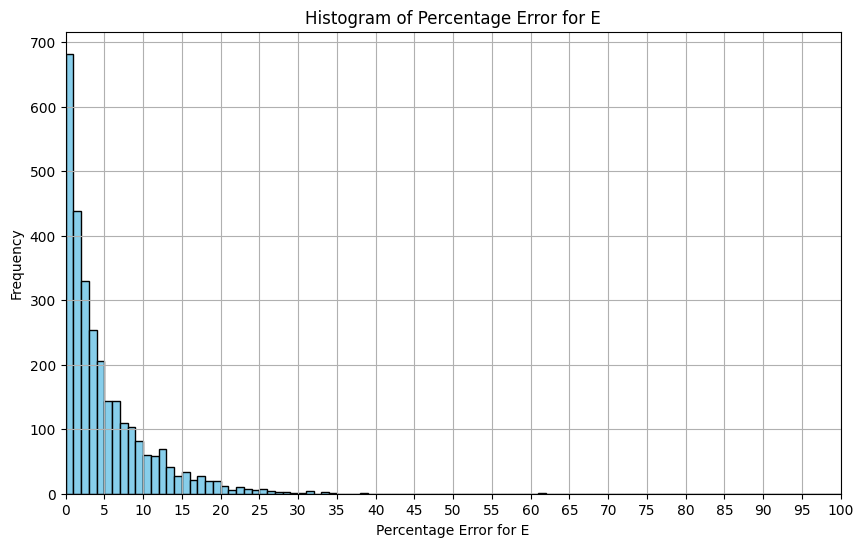

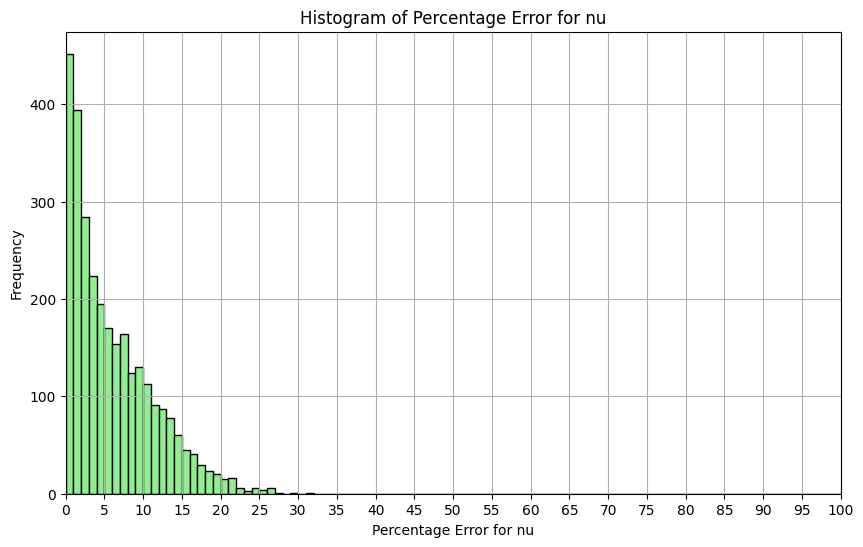

Maximum Percentage Error for E: 61.43907436020169
Minimum Percentage Error for E: 0.0001227098253801676
Maximum Percentage Error for mu: 31.772218242751116
Minimum Percentage Error for mu: 0.00024174291674766365


In [8]:
import matplotlib.pyplot as plt



print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'metal_xgb_no_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('metal_xgb_no_scale_merge.pkl')

## **Scaled**

---



In [ ]:


# Assuming dataf is your DataFrame
data['E'] *= 10
data['nu'] *= 10000
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
Y

E      nu
0       1280.000000  3700.0
1        500.000000  3600.0
2        670.000000  3400.0
3        410.000000  2800.0
4       1050.000000  4000.0
...             ...     ...
293682  1867.456557  2810.1
293683   332.533185  3485.4
293684   531.126578  2694.4
293685  1022.096396  2763.5
293686  1731.912022  3231.7

[293687 rows x 2 columns]

In [ ]:
xgb_model = XGBRegressor(n_estimators=100000, random_state=42, learning_rate=0.004)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 5846.883832871184
Mean Squared Error for mu: 59882.92752455107


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 10
results_df['Predicted_E'] /= 10
results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 4.9171400620266885
Mean Absolute Error for mu: 0.018949508086150302
Standard Deviation for E: 5.856812382963921
Standard Deviation for mu: 0.015486351271275548
Mean Absolute percentage Error for E: 5.163699106881577
Mean Absolute percentage Error for mu: 6.338479435121721
Mode Percentage Error for E: ModeResult(mode=1.0, count=514) 
Mode Percentage Error for E: ModeResult(mode=0.1, count=47) 
        Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      60.729114    58.305817   2.423297    0.28383      0.286202  0.002372   
1     211.231622   213.158127   1.926507    0.25127      0.271798  0.020528   
2      39.764759    41.798866   2.034109    0.33030      0.303271  0.027029   
3      68.636286    56.060982  12.575306    0.35874      0.316073  0.042667   
4     140.790428   135.793839   4.996592    0.26822      0.284233  0.016013   
...          ...          ...        ...        ...           ...       ...   
2932   17.503313    18.5

Median Percentage Error for E: 3.3051117442294458
Median Percentage Error for mu: 5.0198643481447975
Mean Absolute Error for E: 4.9171400620266885
Mean Absolute Error for mu: 0.018949508086150302
Standard Deviation for E: 5.856812382963921
Standard Deviation for mu: 0.015486351271275548


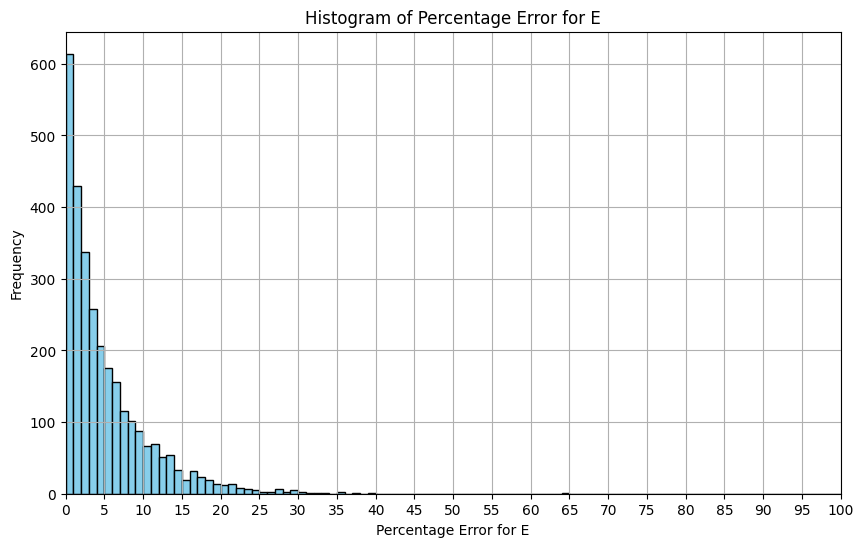

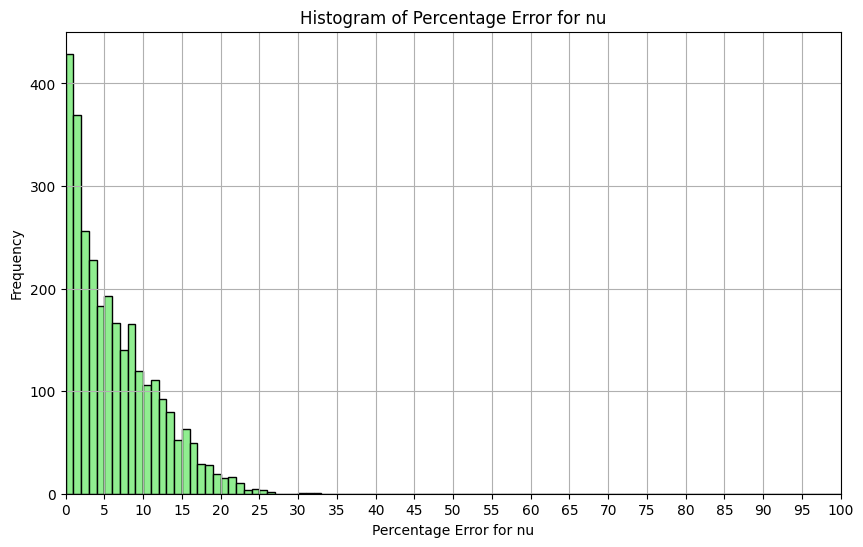

Maximum Percentage Error for E: 64.28750028799007
Minimum Percentage Error for E: 0.00016856794669913524
Maximum Percentage Error for mu: 32.59166663543417
Minimum Percentage Error for mu: 0.001421525086132644


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'metal_xgb_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('metal_xgb_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **only nu scaled**

In [ ]:
# X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# Y = data[['E', 'mu']]

# # Assuming dataf is your DataFrame
data['E'] /= 10
# data['mu'] *= 10000
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
data

rho           E      nu  a  b  c        f1        f2  \
0        6110.000000  128.000000  3700.0  1  2  8  0.673035  0.728011   
1        7310.000000   50.000000  3600.0  1  2  8  0.920299  0.929082   
2        6511.000000   67.000000  3400.0  1  2  8  0.855240  0.870606   
3        7010.000000   41.000000  2800.0  1  2  8  0.936469  0.954165   
4        8570.000000  105.000000  4000.0  1  2  8  0.841755  0.853253   
...              ...         ...     ... .. .. ..       ...       ...   
293682  17062.588420  186.745656  2810.1  4  6  7  0.977860  0.979278   
293683   5340.442084   33.253319  3485.4  4  6  7  0.992497  0.992632   
293684  10183.233930   53.112658  2694.4  4  6  7  0.991820  0.992300   
293685   9181.825681  102.209640  2763.5  4  6  7  0.977194  0.977220   
293686  10250.577320  173.191202  3231.7  4  6  7  0.962830  0.963215   

              f3        f4  ...       f21       f22       f23       f24  \
0       0.741976  0.769326  ...  1.087171  1.108797  1.118980  1.147124   
1       0.930513  0.931765  ...  1.050433  1.051583  1.054046  1.054303   
2       0.880019  0.880077  ...  1.048381  1.055423  1.063596  1.063681   
3       0.954842  0.968828  ...  1.023546  1.023736  1.029884  1.036943   
4       0.876858  0.880704  ...  1.062618  1.062693  1.067246  1.095626   
...          ...       ...  ...       ...       ...       ...       ...   
293682  0.979523  0.979627  ...  1.010155  1.010504  1.011443  1.014072   
293683  0.992896  0.993924  ...  1.003336  1.004670  1.004833  1.005249   
293684  0.992894  0.993118  ...  1.002629  1.002801  1.003355  1.003696   
293685  0.979613  0.980165  ...  1.006481  1.007765  1.008176  1.012310   
293686  0.963512  0.965959  ...  1.010482  1.012294  1.016220  1.016688   

             f25       f26       f27       f28       f29       f30  
0       1.148189  1.175179  1.183941  1.195690  1.209729  1.232676  
1       1.056372  1.060492  1.068504  1.071042  1.074012  1.074721  
2       1.078316  1.098101  1.098671  1.105719  1.128428  1.131313  
3       1.037585  1.050004  1.051020  1.056617  1.058855  1.066637  
4       1.109565  1.110328  1.110342  1.124554  1.136007  1.140405  
...          ...       ...       ...       ...       ...       ...  
293682  1.014278  1.015275  1.016253  1.016722  1.018660  1.020192  
293683  1.006102  1.006469  1.006631  1.007005  1.007292  1.007401  
293684  1.005199  1.005365  1.005713  1.005767  1.006547  1.007411  
293685  1.013547  1.016362  1.019045  1.019056  1.020931  1.021633  
293686  1.018899  1.019469  1.023167  1.024179  1.029690  1.031406  

[293687 rows x 36 columns]

In [ ]:
y_test

array([[  60.72911385, 2838.3       ],
       [ 211.2316224 , 2512.7       ],
       [  39.76475886, 3303.        ],
       ...,
       [ 150.8052351 , 3549.1       ],
       [  59.538     , 2550.        ],
       [  60.82266178, 3149.3       ]])

In [ ]:
xgb_model = XGBRegressor(n_estimators=100000, random_state=42, learning_rate=0.004)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 57.862285122147796
Mean Squared Error for mu: 59922.05655245623


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 4.876531910509649
Mean Absolute Error for mu: 0.018950110497531494
Standard Deviation for E: 5.838949380132442
Standard Deviation for mu: 0.015498247007703365
Mean Absolute percentage Error for E: 5.130855174833047
Mean Absolute percentage Error for mu: 6.3353844801247945
Mode Percentage Error for E: ModeResult(mode=1.0, count=533) 
Mode Percentage Error for E: ModeResult(mode=0.7, count=55) 
        Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      60.729114    57.992535   2.736579    0.28383      0.286787  0.002957   
1     211.231622   212.734421   1.502798    0.25127      0.268469  0.017199   
2      39.764759    39.728821   0.035938    0.33030      0.308966  0.021334   
3      68.636286    57.878872  10.757414    0.35874      0.317094  0.041646   
4     140.790428   136.145020   4.645408    0.26822      0.282920  0.014700   
...          ...          ...        ...        ...           ...       ...   
2932   17.503313    18.8

Median Percentage Error for E: 3.302080463247317
Median Percentage Error for mu: 4.891143768050332
Mean Absolute Error for E: 4.876531910509649
Mean Absolute Error for mu: 0.018950110497531494
Standard Deviation for E: 5.838949380132442
Standard Deviation for mu: 0.015498247007703365


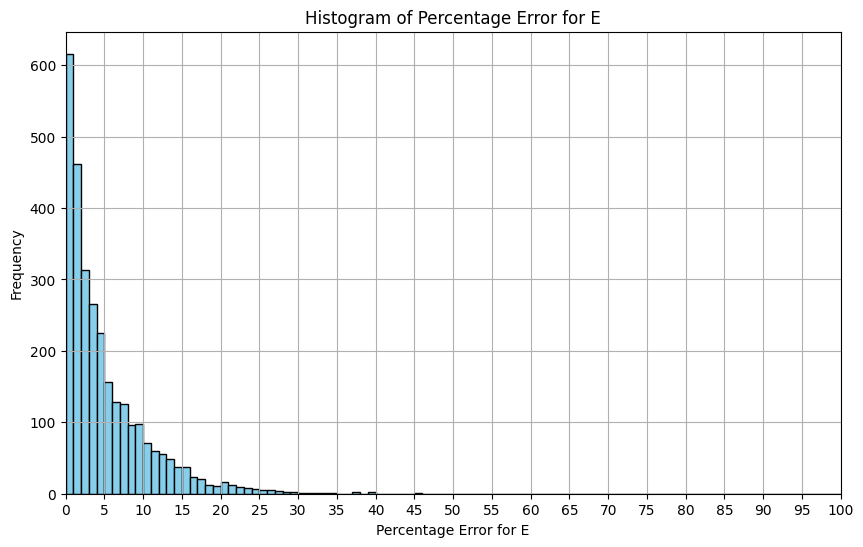

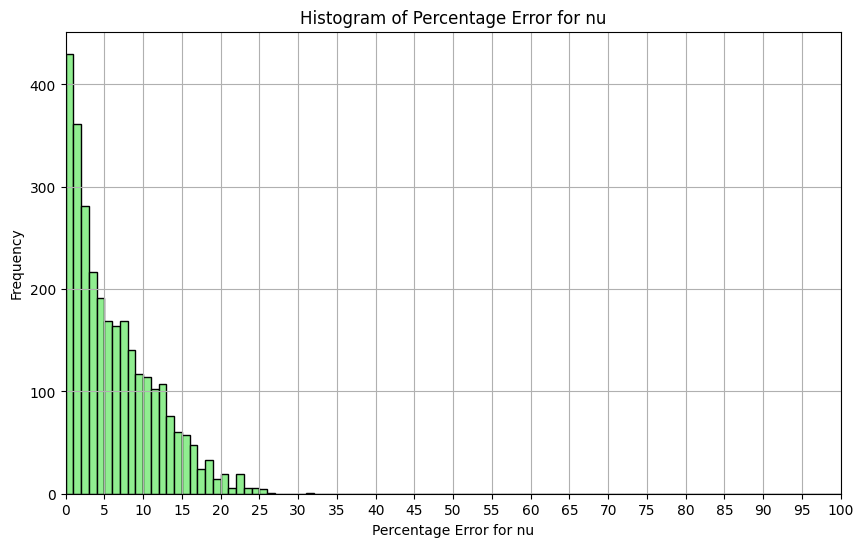

Maximum Percentage Error for E: 45.25701150555639
Minimum Percentage Error for E: 0.00022376996469925713
Maximum Percentage Error for mu: 31.857634334147892
Minimum Percentage Error for mu: 0.004110263056835637


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'metal_xgb_nu_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('metal_xgb_nu_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>